<h1><b><center>Z Score</center></b></h1>

<h3>What is Z Score?</h3>

Z score is an important concept in statistics. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

<h5>Z score = (x -mean) / std. deviation</h5>

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.


<h5>Let's understand this practically.</h5>

Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
df=pd.read_csv('bhp.csv')

In [3]:
df.shape

(13200, 7)

In [4]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<h4>Setting threshold values to remove some extreme outliers as to not effect the mathematical analysis of the dataset</h4>

In [5]:
min_threshold,max_threshold = df.price_per_sqft.quantile([0.01,0.99])
min_threshold,max_threshold

(2549.0, 23674.45000000001)

In [6]:
df1 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]

In [7]:
df1.shape

(12932, 7)

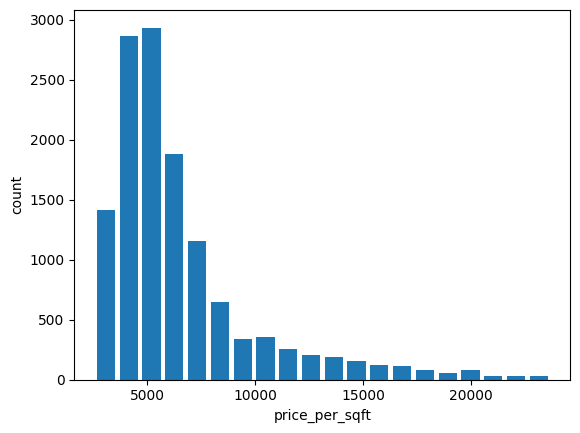

In [8]:
plt.hist(df1.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

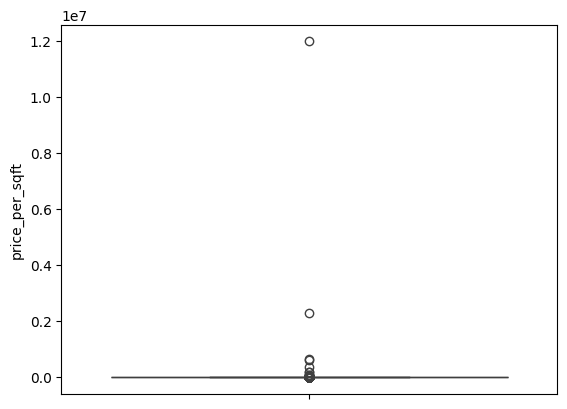

In [9]:
sns.boxplot(data=df.price_per_sqft)
plt.show()

In [10]:
mean=df1.price_per_sqft.mean()
mean

6497.641277451284

In [11]:
std=df1.price_per_sqft.std()
std

3501.731556569727

**Adding new column 'zscore' to the dataset which will have zscore for each data row**

In [12]:
df1['zscore']=(df1.price_per_sqft - mean)/std
df1.head()

C:\Users\MUSKAN\AppData\Local\Temp\ipykernel_23376\2770568390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore']=(df1.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.799216
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.537632
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.626159
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.072148
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.641866


In [13]:
df1[(df1.zscore > 3) | (df1.zscore < -3)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,18181,3.336452
69,other,3 Bedroom,500.00,3.0,100.0,3,20000,3.855909
87,Rajaji Nagar,6 Bedroom,710.00,6.0,160.0,6,22535,4.579837
131,other,4 Bedroom,1200.00,4.0,210.0,4,17500,3.141977
147,other,6 Bedroom,1034.00,5.0,185.0,6,17891,3.253636
...,...,...,...,...,...,...,...,...
12874,Judicial Layout,5 BHK,1100.00,4.0,199.0,5,18090,3.310465
12917,2nd Stage Nagarbhavi,5 Bedroom,1200.00,4.0,240.0,5,20000,3.855909
12967,other,5 BHK,5665.84,7.0,988.0,5,17437,3.123986
12985,other,4 BHK,2920.00,4.0,536.0,4,18356,3.386427


<h5>These are the outliers for this dataset</h5>

<h3>For removing the outliers:</h3>

In [14]:
df2 = df1[(df1.zscore < 3) & (df1.zscore > -3)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.799216
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.537632
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.626159
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.072148
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.641866


In [15]:
df2.shape

(12612, 8)

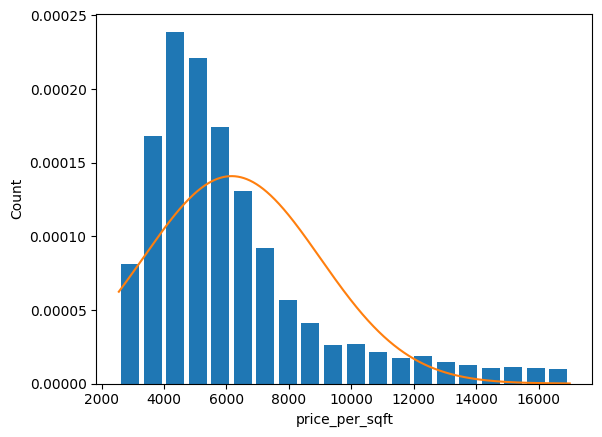

In [16]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')

rng = np.arange(df2.price_per_sqft.min(), df2.price_per_sqft.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))